# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's BipedalWalker-v2 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
import random
import copy
from collections import namedtuple, deque
from replay_buffer import ReplayBuffer

import tensorflow as tf
from keras import backend as K
from keras.layers import Dense, Input, Add, Activation,LeakyReLU
from keras.layers import GaussianNoise, Dropout, Concatenate
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent
from BFSWorld import BFSWorldEnv
from infoCalc import *

Using TensorFlow backend.


### 2. Instantiate the Environment and Agent

In [2]:
sess = tf.Session()
K.set_session(sess)

env = BFSWorldEnv()
env.seed(10)
print(env.action_space.shape[0])
agent = Agent(env, sess,state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], random_seed=10)
#agent.NetworkSummary()
#agent.load_network('savedModels/', 'saved.h5')

4
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

Episode 300	Average Score: -27.44	Score: -5.6507
Episode 600	Average Score: -20.71	Score: -28.492
Episode 900	Average Score: -17.96	Score: -10.001
Episode 1200	Average Score: -13.95	Score: -10.00
Episode 1500	Average Score: -11.00	Score: -10.008
Episode 1800	Average Score: -7.86	Score: -7.1101
Episode 2100	Average Score: 2.73	Score: 56.87076
Episode 2400	Average Score: 92.90	Score: -10.003
Episode 2700	Average Score: 210.93	Score: 493.313
Episode 3000	Average Score: 397.01	Score: 1052.30
Episode 3300	Average Score: 566.01	Score: 1331.18
Episode 3600	Average Score: 808.57	Score: 1584.73
Episode 3900	Average Score: 1307.84	Score: 4955.51
Episode 4200	Average Score: 1821.59	Score: 1166.12
Episode 4500	Average Score: 2323.22	Score: 2984.93
Episode 4800	Average Score: 2317.04	Score: -24.505
Episode 5000	Average Score: 2238.46	Score: -10.008

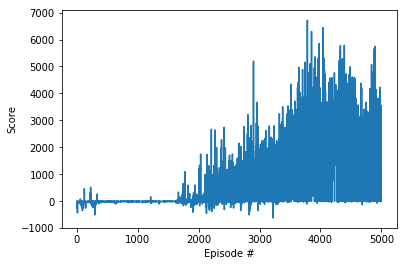

In [3]:
def ddpg(n_episodes=5000, max_t=30):
    scores_deque = deque(maxlen=1000)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        #agent.reset()

        score = 0
        for t in range(max_t):
            #print(t,len(env.StateBuffer),state,score)
            action = agent.act(state,True)
            #print(t,len(env.StateBuffer),state,score,action)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            #print(score)
            #env.render()
            if done:
                #print("done",done)
                break 
        #env.render()
        scores_deque.append(score)
        scores.append(score)
        #env.render()
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 300 == 0:
            agent.save_network('savedModels/', 'saved.h5')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            #state = env.reset()
            
        
        
    agent.save_network('savedModels/', 'saved.h5')
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

Successfully saved network.


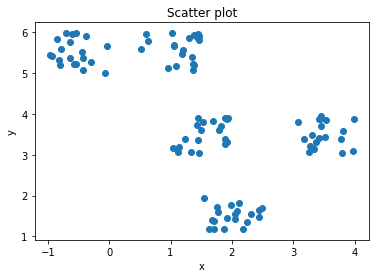

-19.716407659390292
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))


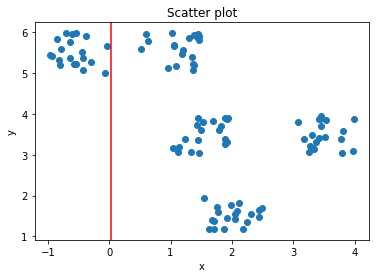

-19.93665480348404
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))


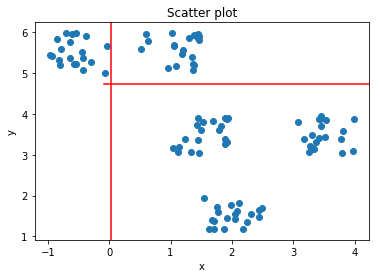

2497.215893907171
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))


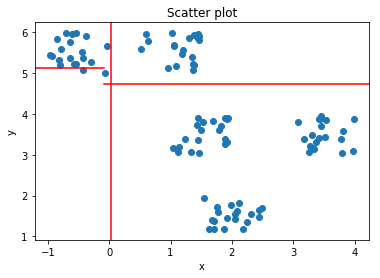

-17.78568687142655
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))


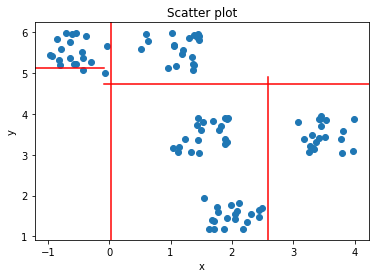

216.01482478251225
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))


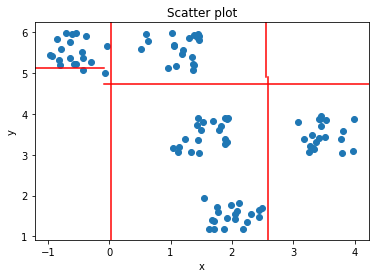

-18.885481916049976
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

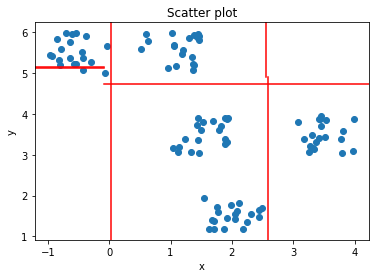

-5.0
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=float32))


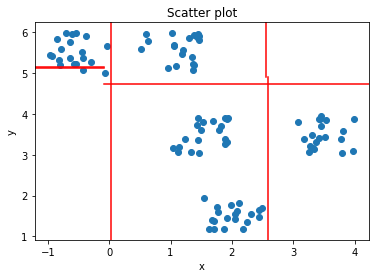

637.2019857340761
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=floa

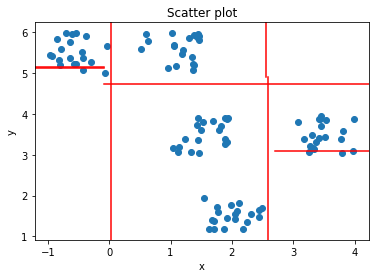

-19.806159869157884
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

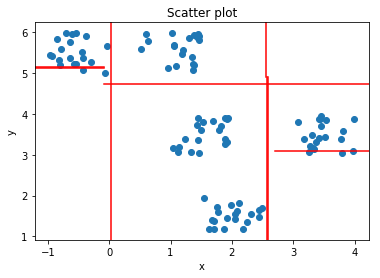

-10.540818238713427
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

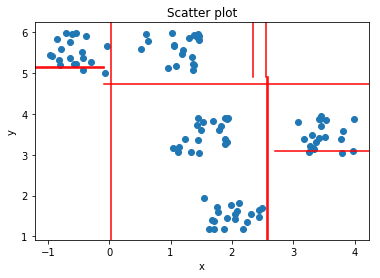

-5.504035949707031
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

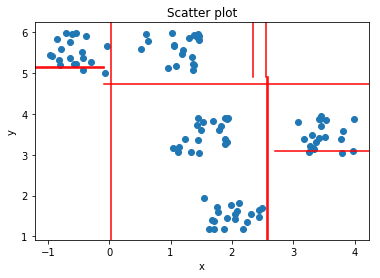

-5.000540614128113
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

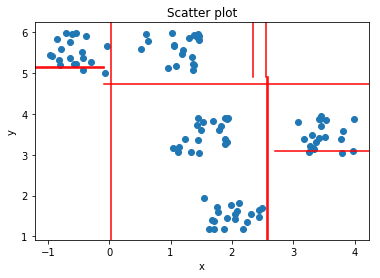

-5.756264891475439
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

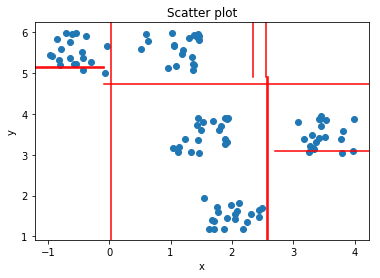

-4.046386241912842
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

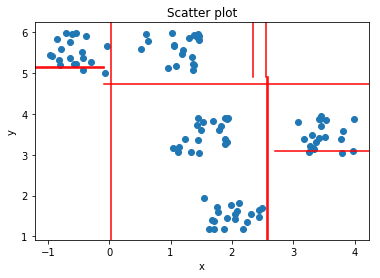

158.54761973273406
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

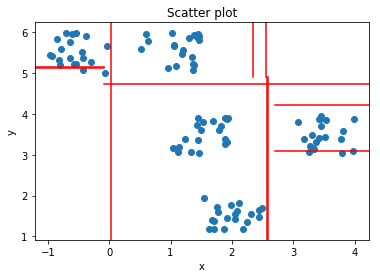

-19.918904224495144
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

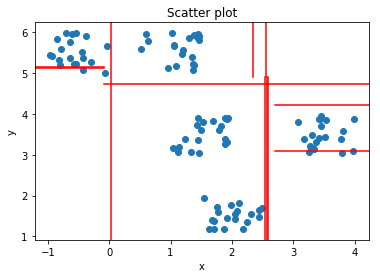

-4.124222308397293
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

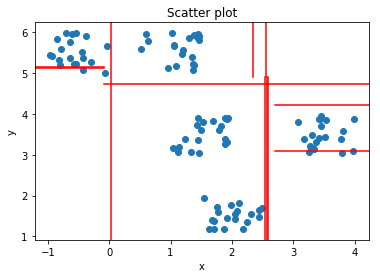

-19.999508737248412
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

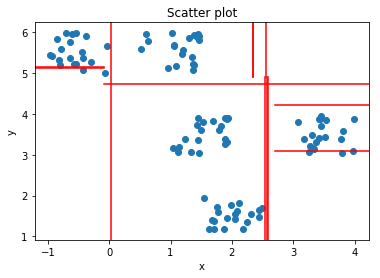

-5.219660401344299
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

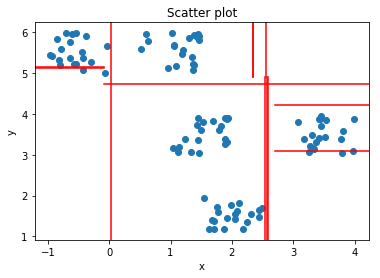

-4.781878128647804
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

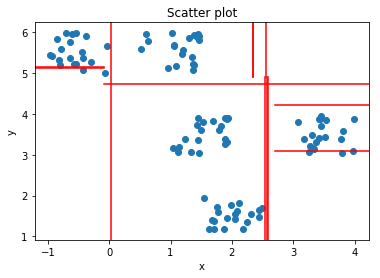

-5.1250845193862915
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

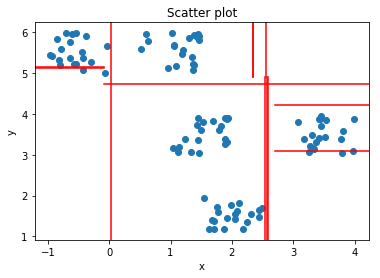

-19.94325608888679
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

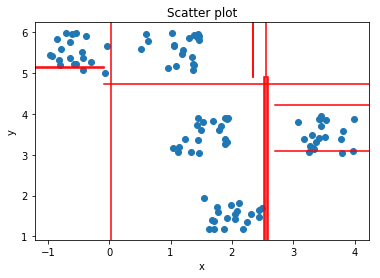

-4.1229667365550995
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

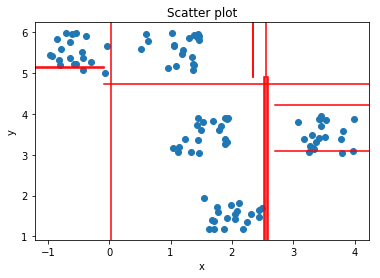

-19.99999997602029
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

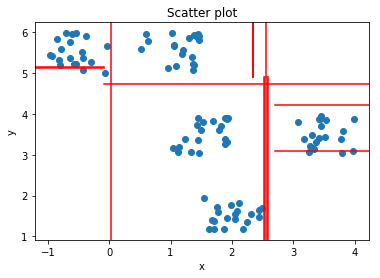

-5.101049542427063
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

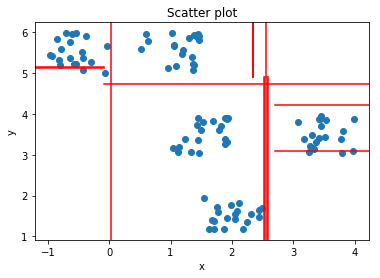

-19.960392257963846
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

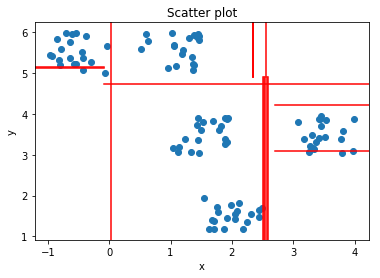

-4.12190905213356
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=floa

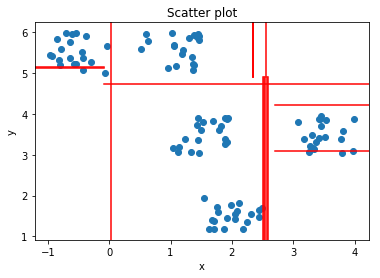

-5.10023295879364
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=floa

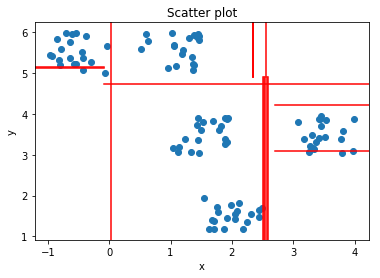

-5.0
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=float32))
StateAc

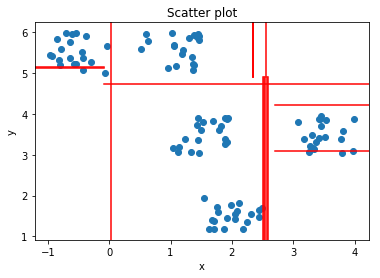

-19.972410021963356
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

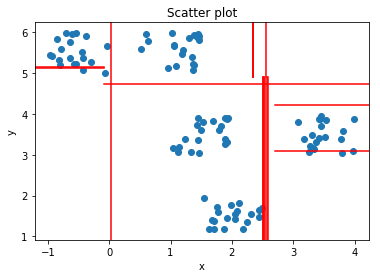

-4.121030777692795
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

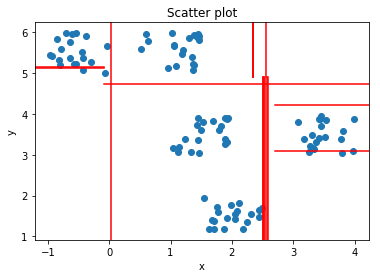

54.78265427127373
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=floa

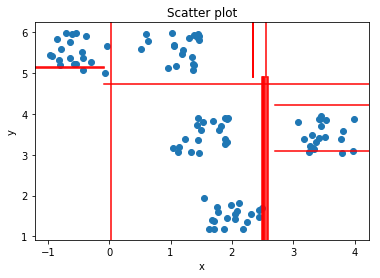

-4.120301365852356
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

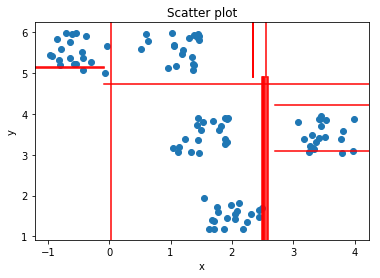

-4.119695782661438
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

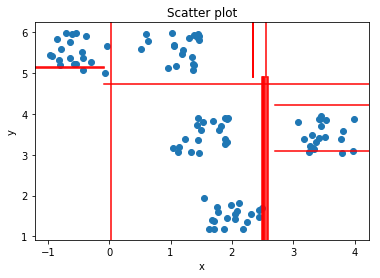

-20.161329272478916
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

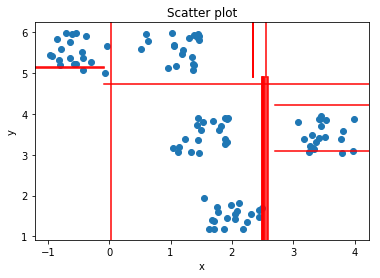

-20.11379549093582
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

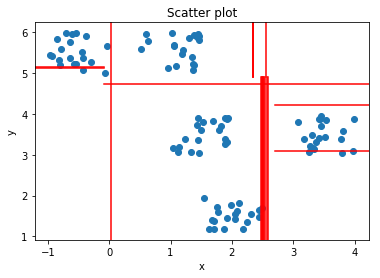

-4.119192868471146
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

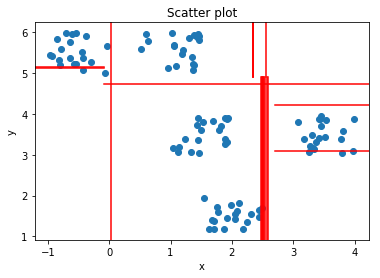

-20.07920519392135
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

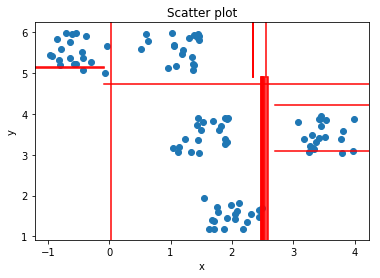

-4.118776381015778
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

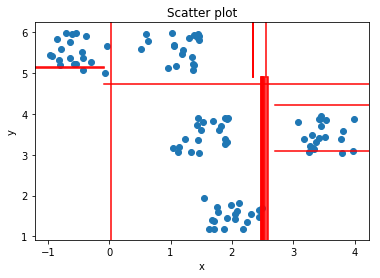

-4.118437230587006
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

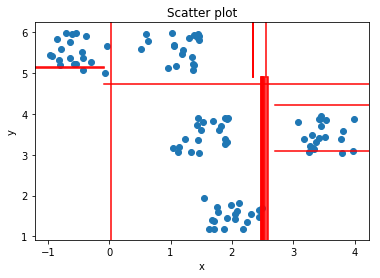

-20.055515376043978
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

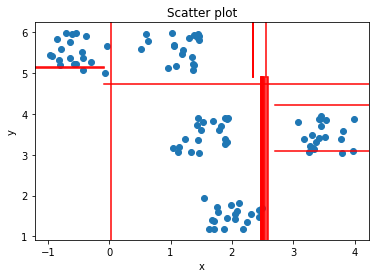

-20.03923012378948
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

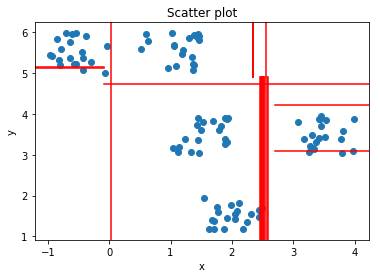

-4.1181614100933075
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

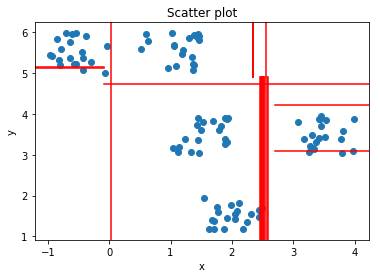

-20.027967642275417
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

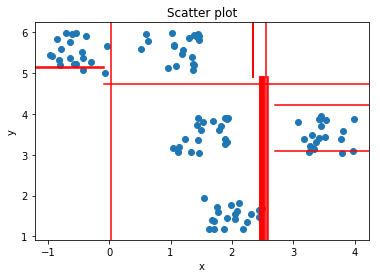

-4.117936849594116
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

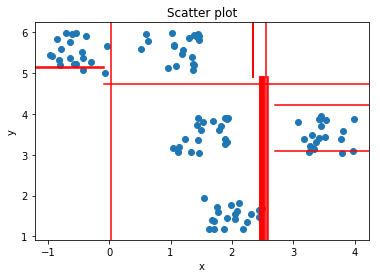

-4.1177546083927155
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

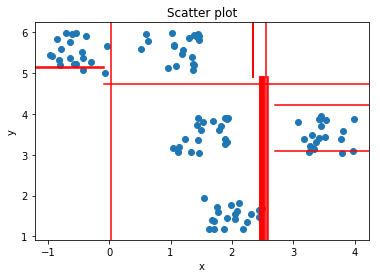

-20.020127084006116
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

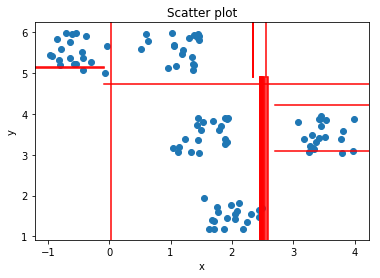

-4.117606043815613
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

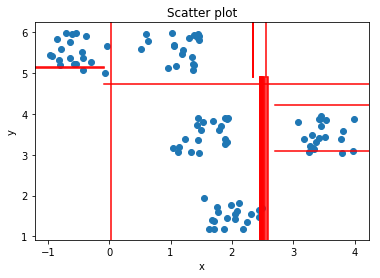

-20.01463361475107
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

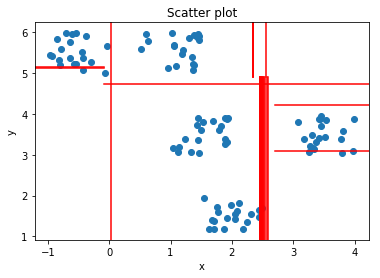

-4.117485046386719
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

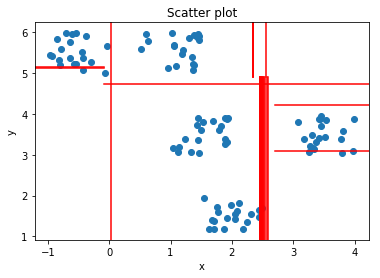

-20.010748006669115
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

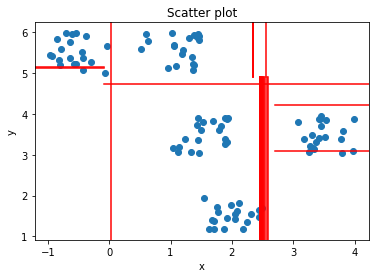

-4.117386847734451
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

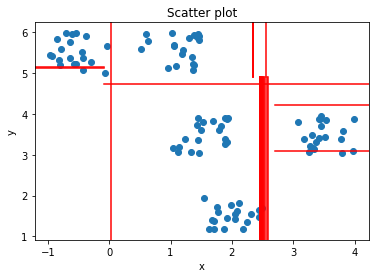

-20.00797849730283
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

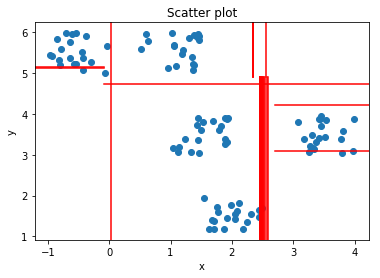

-4.117306977510452
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

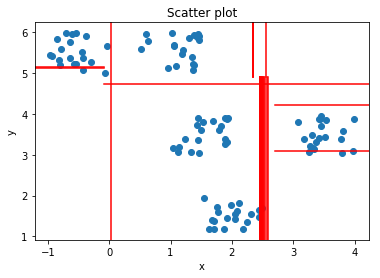

-20.005980670192418
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

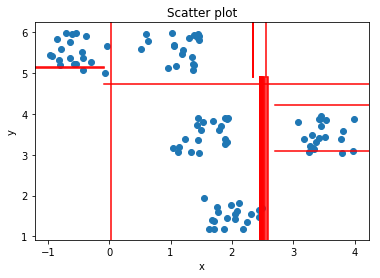

-4.117241561412811
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

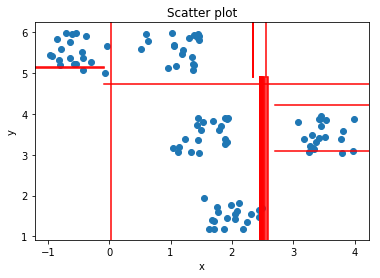

-20.00452868560652
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

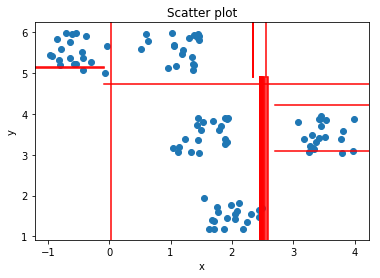

-20.003462469364557
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

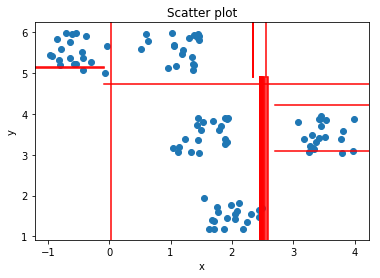

-4.117188513278961
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

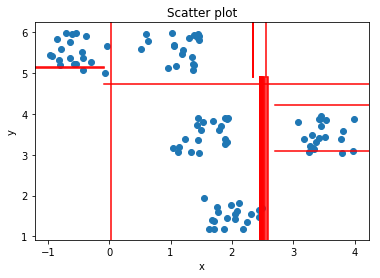

-20.00266837745011
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

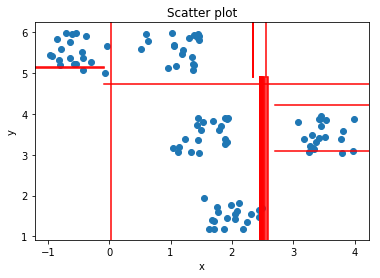

-4.117145150899887
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

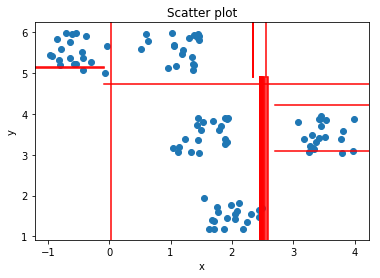

-20.00207336296132
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

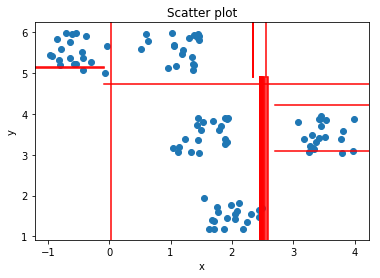

-4.1171102821826935
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

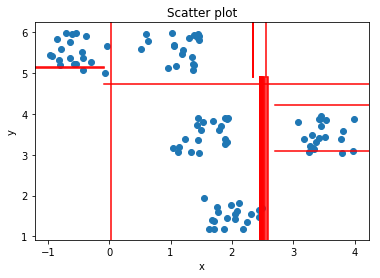

-4.117081820964813
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

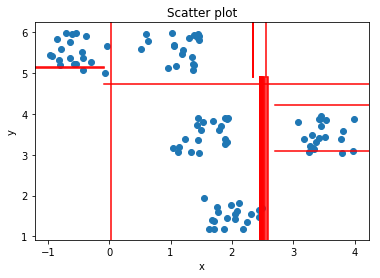

-20.001622114080835
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

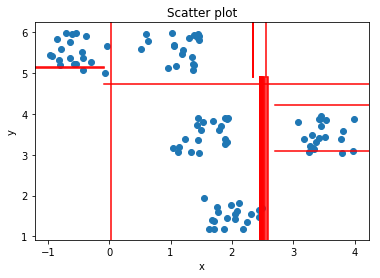

-4.117058575153351
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

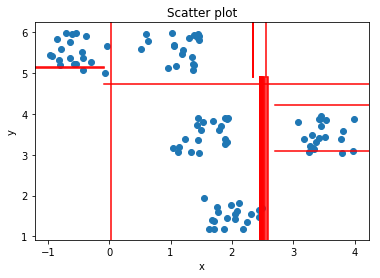

-20.00127682394435
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

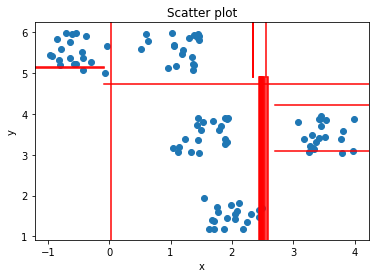

-4.117039650678635
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

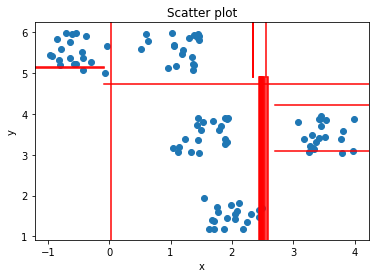

-20.001008976528993
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

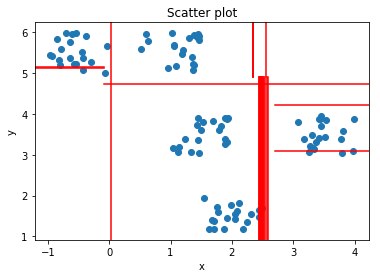

-20.000802680708567
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=fl

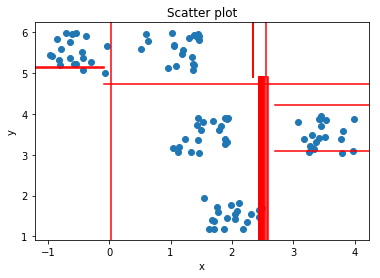

-4.117024004459381
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

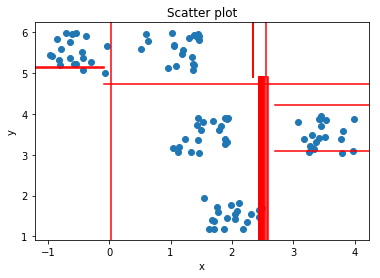

-4.117011338472366
StateAction(state=array([[-1.,  4.],
       [ 1.,  6.]]), action=array([9.9921787e-01, 7.7339844e-04, 8.6554082e-06, 4.1218629e-01],
      dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 6.        ]]), action=array([0.42000252, 0.43362153, 0.14637592, 1.4938097 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 1.        ,  6.        ]]), action=array([0.22337842, 0.718658  , 0.05796362, 1.6469362 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [1.        , 4.73452425]]), action=array([0.46819383, 0.3371277 , 0.19467849, 1.4387732 ], dtype=float32))
StateAction(state=array([[0.03046574, 4.        ],
       [4.73452425, 6.        ]]), action=array([0.47351298, 0.32861254, 0.19787452, 1.4223511 ], dtype=float32))
StateAction(state=array([[-1.        ,  0.03046574],
       [ 5.11734045,  6.        ]]), action=array([0.20818757, 0.7413506 , 0.05046185, 1.6573234 ], dtype=flo

KeyboardInterrupt: 

In [4]:
agent.load_network('savedModels/', 'saved.h5')
state = env.reset()
   
while True:
    action = agent.act(state,False)
    env.render()
    next_state, reward, done, _ = env.step(action)
    print(reward)
    state = next_state
    if done:
        break
        
env.close()

### 5. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  